In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

base = '/content/drive/MyDrive/SME_Loan_Default'

folders = [
    f'{base}/data/raw',
    f'{base}/data/processed',
    f'{base}/models',
    f'{base}/outputs'
]

for folder in folders:
    os.makedirs(folder, exist_ok=True)
    print(f"✅ Created: {folder}")

print("\n🎉 Project folder structure ready!")

✅ Created: /content/drive/MyDrive/SME_Loan_Default/data/raw
✅ Created: /content/drive/MyDrive/SME_Loan_Default/data/processed
✅ Created: /content/drive/MyDrive/SME_Loan_Default/models
✅ Created: /content/drive/MyDrive/SME_Loan_Default/outputs

🎉 Project folder structure ready!


In [ ]:
!pip install faker lightgbm imbalanced-learn shap plotly -q
print("✅ All libraries installed!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 37.8 MB/s eta 0:00:00
✅ All libraries installed!


In [ ]:
import pandas as pd
import numpy as np
from faker import Faker
import random

fake = Faker('en_IN')
np.random.seed(42)
random.seed(42)

n = 5000

data = {
    'business_id': [fake.uuid4()[:8] for _ in range(n)],
    'business_name': [fake.company() for _ in range(n)],
    'business_age_years': np.random.randint(1, 20, n),
    'industry': np.random.choice(
        ['Retail', 'Manufacturing', 'Services', 'Food', 'Construction', 'Technology'], n
    ),
    'location_tier': np.random.choice(['Tier1', 'Tier2', 'Tier3'], n, p=[0.3, 0.4, 0.3]),
    'num_employees': np.random.randint(1, 200, n),

    # Alternative Data
    'gst_filing_rate': np.random.uniform(0.3, 1.0, n),
    'avg_monthly_revenue': np.random.uniform(50000, 5000000, n),
    'revenue_growth_6m': np.random.uniform(-0.4, 0.6, n),
    'cash_flow_volatility': np.random.uniform(0.05, 0.95, n),
    'upi_txn_volume_monthly': np.random.randint(5, 5000, n),
    'vendor_payment_delay_days': np.random.randint(0, 90, n),
    'utility_payment_ontime_rate': np.random.uniform(0.4, 1.0, n),
    'bank_balance_avg': np.random.uniform(10000, 2000000, n),

    # Loan Details
    'loan_amount': np.random.randint(100000, 5000000, n),
    'loan_tenure_months': np.random.choice([12, 24, 36, 48, 60], n),
    'interest_rate': np.random.uniform(8.5, 24.0, n),
    'previous_loans_count': np.random.randint(0, 5, n),
    'previous_default_count': np.random.randint(0, 3, n),
}

df = pd.DataFrame(data)

# Realistic default probability tied to risk factors
default_prob = (
    0.30 * (1 - df['gst_filing_rate']) +
    0.20 * df['cash_flow_volatility'] +
    0.20 * (df['revenue_growth_6m'] < 0).astype(int) +
    0.15 * (df['vendor_payment_delay_days'] > 30).astype(int) +
    0.15 * (df['previous_default_count'] > 0).astype(int)
)

df['default'] = (np.random.uniform(0, 1, n) < default_prob).astype(int)

print("✅ Dataset created!")
print(f"📊 Shape: {df.shape}")
print(f"⚠️  Default Rate: {df['default'].mean():.1%}")
print(f"\n📋 Sample Data:")
df.head()

✅ Dataset created!
📊 Shape: (5000, 20)
⚠️  Default Rate: 48.9%

📋 Sample Data:


,business_id,business_name,business_age_years,industry,location_tier,num_employees,gst_filing_rate,avg_monthly_revenue,revenue_growth_6m,cash_flow_volatility,upi_txn_volume_monthly,vendor_payment_delay_days,utility_payment_ontime_rate,bank_balance_avg,loan_amount,loan_tenure_months,interest_rate,previous_loans_count,previous_default_count,default
0,990582ee,Kurian-Munshi,7,Retail,Tier3,86,0.480631,2.964946e+06,-0.096539,0.507284,1671,44,0.858329,1.954042e+05,1236739,36,21.827151,3,2,1
1,2330ca24,Kannan-Pant,15,Construction,Tier2,89,0.351072,4.967413e+06,-0.123139,0.555127,2760,53,0.477242,6.972790e+05,4999089,36,9.986620,4,1,1
2,fc3f0588,Sundaram-Sanghvi,11,Services,Tier1,138,0.811534,4.411417e+06,0.071218,0.904330,323,50,0.720225,9.023329e+05,626633,60,17.435520,1,0,0
3,3b299ff8,Bala LLC,8,Construction,Tier2,113,0.509356,2.704833e+06,0.276150,0.638490,4946,86,0.584980,1.597697e+06,1561249,24,13.607511,2,0,1
4,b8a988b4,Sood-Bali,7,Services,Tier1,157,0.616662,4.952354e+06,0.528846,0.912068,1867,22,0.851352,1.851275e+06,1862235,36,16.457607,2,0,1


In [ ]:
save_path = '/content/drive/MyDrive/SME_Loan_Default/data/raw/sme_raw_data.csv'
df.to_csv(save_path, index=False)
print(f"✅ Data saved to Drive!")
print(f"📁 Path: {save_path}")
print(f"📊 Rows: {len(df)}, Columns: {len(df.columns)}")

✅ Data saved to Drive!
📁 Path: /content/drive/MyDrive/SME_Loan_Default/data/raw/sme_raw_data.csv
📊 Rows: 5000, Columns: 20


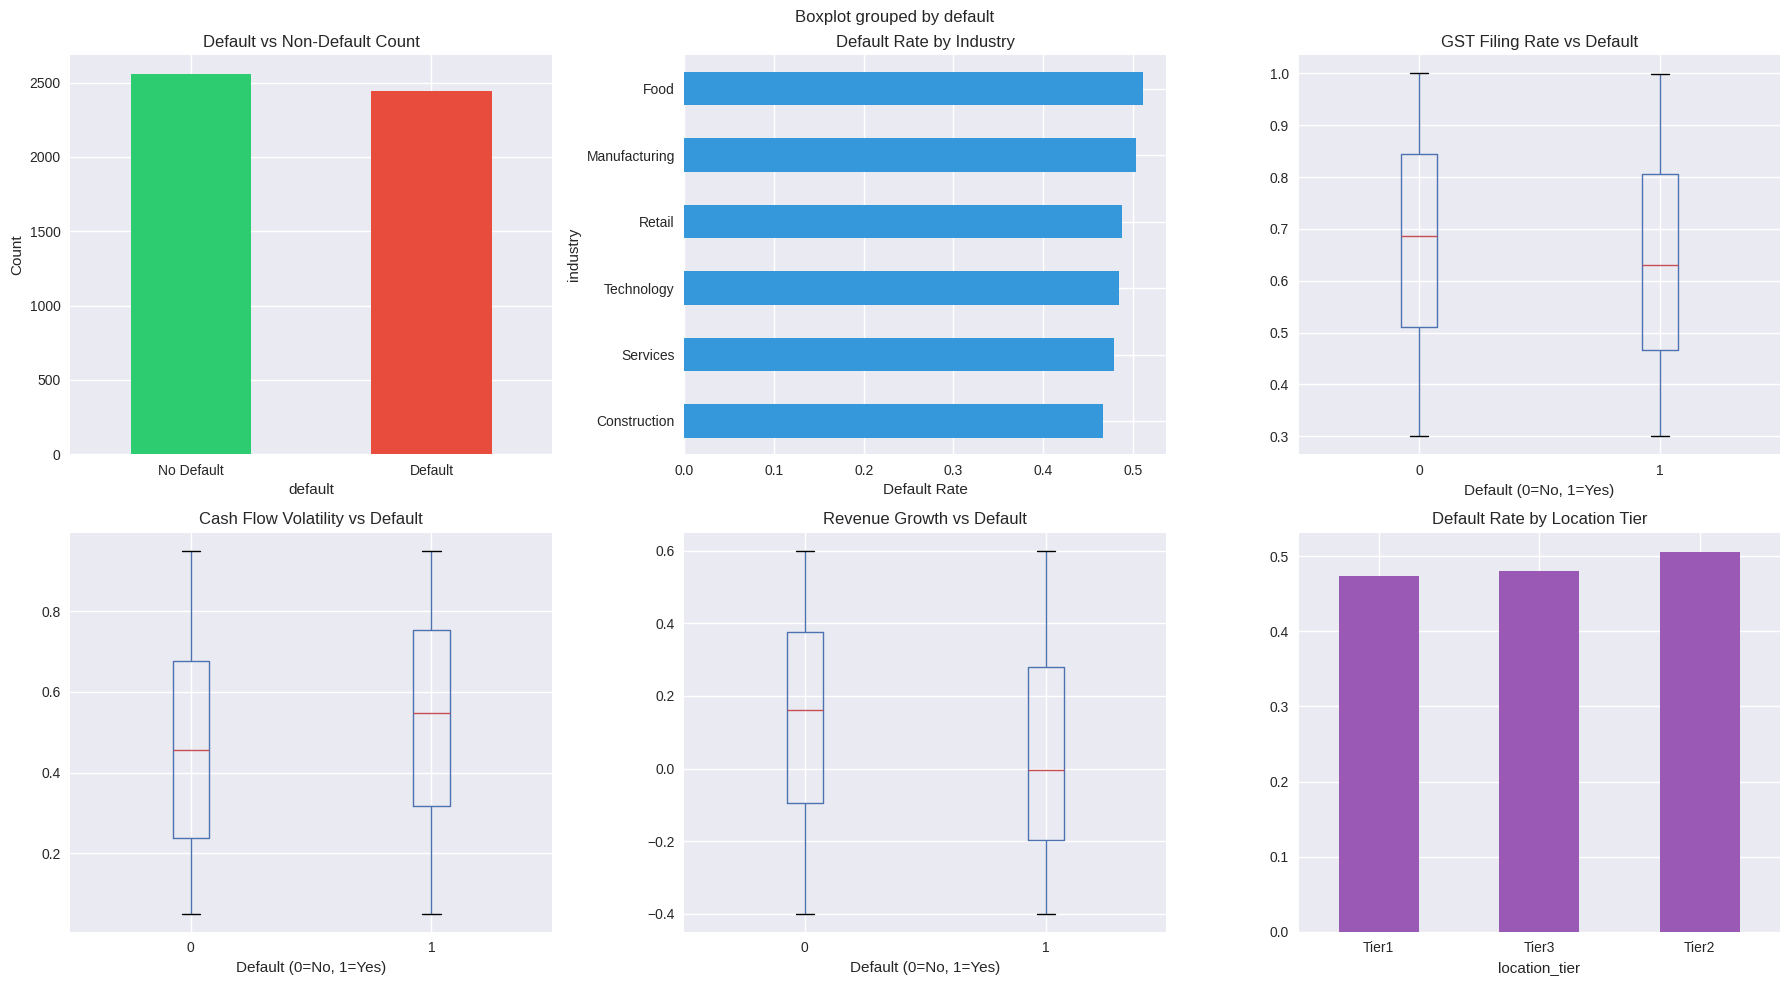

✅ EDA plots saved to Drive!


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('SME Loan Default - Exploratory Data Analysis', fontsize=16, fontweight='bold')

# 1. Default Distribution
colors = ['#2ecc71', '#e74c3c']
df['default'].value_counts().plot(kind='bar', ax=axes[0,0], color=colors)
axes[0,0].set_title('Default vs Non-Default Count')
axes[0,0].set_xticklabels(['No Default', 'Default'], rotation=0)
axes[0,0].set_ylabel('Count')

# 2. Default Rate by Industry
industry_default = df.groupby('industry')['default'].mean().sort_values()
industry_default.plot(kind='barh', ax=axes[0,1], color='#3498db')
axes[0,1].set_title('Default Rate by Industry')
axes[0,1].set_xlabel('Default Rate')

# 3. GST Filing Rate vs Default
df.boxplot(column='gst_filing_rate', by='default', ax=axes[0,2])
axes[0,2].set_title('GST Filing Rate vs Default')
axes[0,2].set_xlabel('Default (0=No, 1=Yes)')
plt.sca(axes[0,2])
plt.title('GST Filing Rate vs Default')

# 4. Cash Flow Volatility vs Default
df.boxplot(column='cash_flow_volatility', by='default', ax=axes[1,0])
axes[1,0].set_title('Cash Flow Volatility vs Default')
axes[1,0].set_xlabel('Default (0=No, 1=Yes)')
plt.sca(axes[1,0])
plt.title('Cash Flow Volatility vs Default')

# 5. Revenue Growth vs Default
df.boxplot(column='revenue_growth_6m', by='default', ax=axes[1,1])
axes[1,1].set_title('Revenue Growth vs Default')
axes[1,1].set_xlabel('Default (0=No, 1=Yes)')
plt.sca(axes[1,1])
plt.title('Revenue Growth vs Default')

# 6. Default Rate by Location Tier
tier_default = df.groupby('location_tier')['default'].mean().sort_values()
tier_default.plot(kind='bar', ax=axes[1,2], color='#9b59b6')
axes[1,2].set_title('Default Rate by Location Tier')
axes[1,2].set_xticklabels(tier_default.index, rotation=0)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/SME_Loan_Default/outputs/eda_plots.png', dpi=150)
plt.show()
print("✅ EDA plots saved to Drive!")

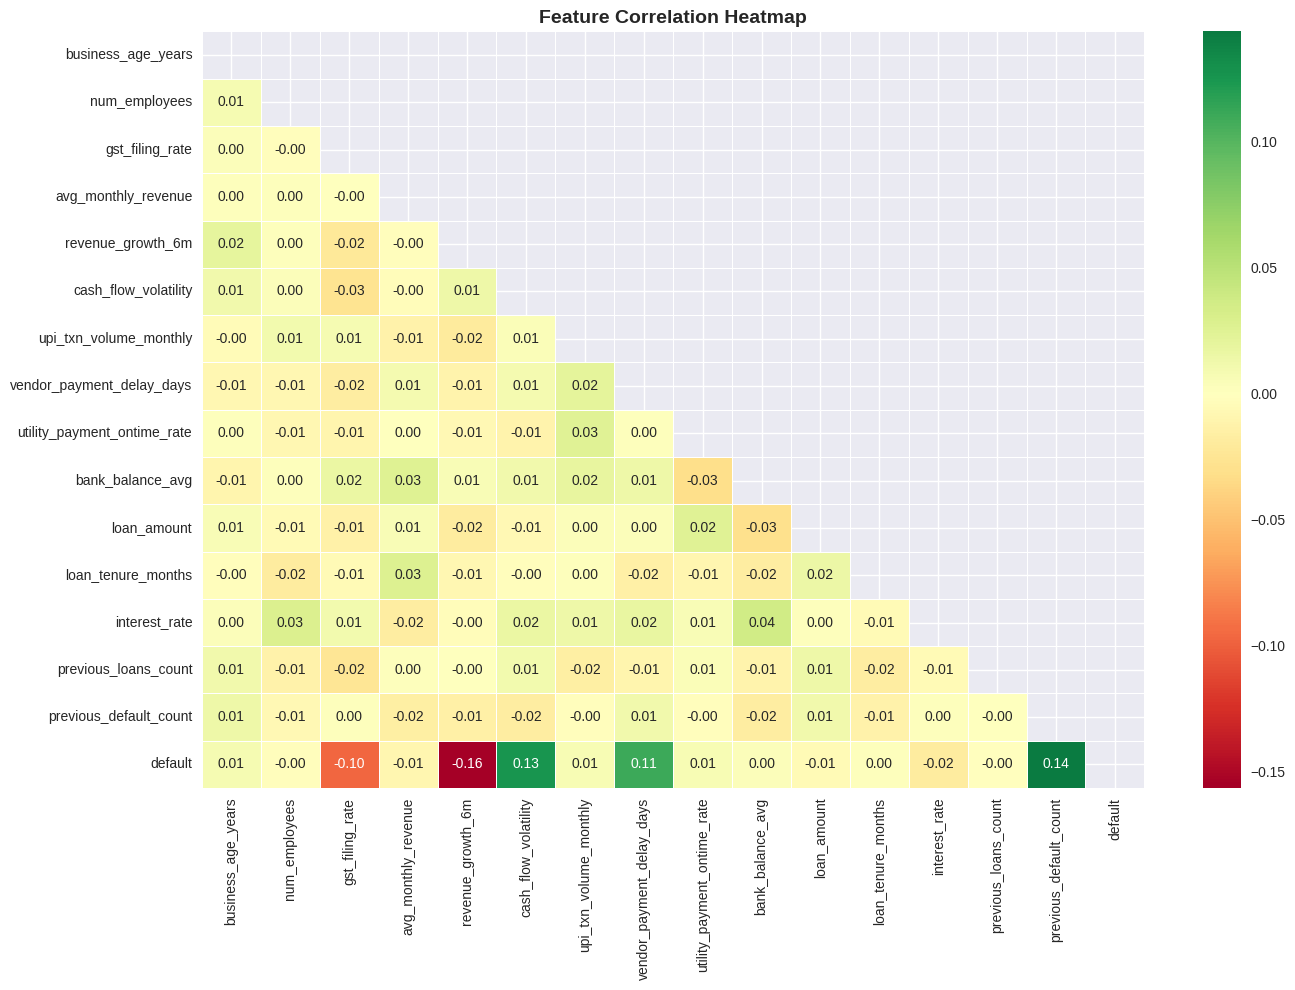

✅ Correlation heatmap saved!


In [ ]:
plt.figure(figsize=(14, 10))
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f',
            cmap='RdYlGn', center=0, linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/SME_Loan_Default/outputs/correlation_heatmap.png', dpi=150)
plt.show()
print("✅ Correlation heatmap saved!")

In [ ]:
# Load the raw data
df = pd.read_csv('/content/drive/MyDrive/SME_Loan_Default/data/raw/sme_raw_data.csv')
print(f"✅ Loaded: {df.shape}")

# --- Create 10 New Features ---

# 1. Financial Health Score (composite score)
df['financial_health_score'] = (
    df['gst_filing_rate'] * 0.30 +
    df['utility_payment_ontime_rate'] * 0.20 +
    (1 - df['cash_flow_volatility']) * 0.20 +
    df['revenue_growth_6m'].clip(-1, 1).apply(lambda x: (x + 1) / 2) * 0.30
).round(4)

# 2. Loan Stress Ratio
df['loan_to_revenue_ratio'] = (df['loan_amount'] / df['avg_monthly_revenue']).round(4)

# 3. Payment Behavior Score
df['payment_behavior_score'] = (
    (1 - (df['vendor_payment_delay_days'] / 90)) * 0.5 +
    df['utility_payment_ontime_rate'] * 0.5
).round(4)

# 4. Business Maturity Flag
df['is_mature_business'] = (df['business_age_years'] >= 5).astype(int)

# 5. Digital Adoption Score
df['digital_adoption_score'] = (
    np.log1p(df['upi_txn_volume_monthly']) / np.log1p(5000)
).round(4)

# 6. Revenue Stress Flag
df['revenue_stress'] = (df['revenue_growth_6m'] < -0.1).astype(int)

# 7. High Risk Loan Flag
df['high_risk_loan'] = (df['loan_to_revenue_ratio'] > 5).astype(int)

# 8. Bank Balance to Loan Ratio
df['balance_to_loan_ratio'] = (df['bank_balance_avg'] / df['loan_amount']).round(4)

# 9. Repeat Defaulter Flag
df['repeat_defaulter'] = (df['previous_default_count'] > 0).astype(int)

# 10. Monthly EMI Burden
df['monthly_emi_burden'] = (
    (df['loan_amount'] / df['loan_tenure_months']) / df['avg_monthly_revenue']
).round(4)

print("✅ 10 new features created!")
print(f"📊 New shape: {df.shape}")

✅ Loaded: (5000, 20)
✅ 10 new features created!
📊 New shape: (5000, 30)


In [ ]:
# Encode categorical columns
df = pd.get_dummies(df, columns=['industry', 'location_tier'], drop_first=False)

# Drop non-numeric identifier columns
df.drop(['business_id', 'business_name'], axis=1, inplace=True)

# Save processed data
save_path = '/content/drive/MyDrive/SME_Loan_Default/data/processed/sme_features.csv'
df.to_csv(save_path, index=False)

print(f"✅ Processed data saved!")
print(f"📊 Final Shape: {df.shape}")
print(f"🔢 Total Features: {df.shape[1] - 1}")
print(f"\n📋 All Columns:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")

✅ Processed data saved!
📊 Final Shape: (5000, 35)
🔢 Total Features: 34

📋 All Columns:
  1. business_age_years
  2. num_employees
  3. gst_filing_rate
  4. avg_monthly_revenue
  5. revenue_growth_6m
  6. cash_flow_volatility
  7. upi_txn_volume_monthly
  8. vendor_payment_delay_days
  9. utility_payment_ontime_rate
  10. bank_balance_avg
  11. loan_amount
  12. loan_tenure_months
  13. interest_rate
  14. previous_loans_count
  15. previous_default_count
  16. default
  17. financial_health_score
  18. loan_to_revenue_ratio
  19. payment_behavior_score
  20. is_mature_business
  21. digital_adoption_score
  22. revenue_stress
  23. high_risk_loan
  24. balance_to_loan_ratio
  25. repeat_defaulter
  26. monthly_emi_burden
  27. industry_Construction
  28. industry_Food
  29. industry_Manufacturing
  30. industry_Retail
  31. industry_Services
  32. industry_Technology
  33. location_tier_Tier1
  34. location_tier_Tier2
  35. location_tier_Tier3


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
import pickle
import warnings
warnings.filterwarnings('ignore')

# Load processed data
df = pd.read_csv('/content/drive/MyDrive/SME_Loan_Default/data/processed/sme_features.csv')

X = df.drop('default', axis=1)
y = df['default']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"✅ Train size: {X_train.shape}")
print(f"✅ Test size:  {X_test.shape}")
print(f"📊 Train default rate: {y_train.mean():.1%}")
print(f"📊 Test default rate:  {y_test.mean():.1%}")

✅ Train size: (4000, 34)
✅ Test size:  (1000, 34)
📊 Train default rate: 48.9%
📊 Test default rate:  48.9%


In [ ]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", dict(y_train.value_counts()))
print("After SMOTE: ", dict(pd.Series(y_train_sm).value_counts()))
print("✅ Class imbalance handled!")

Before SMOTE: {0: np.int64(2045), 1: np.int64(1955)}
After SMOTE:  {0: np.int64(2045), 1: np.int64(2045)}
✅ Class imbalance handled!


In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest':       RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost':             XGBClassifier(n_estimators=200, max_depth=6,
                                         learning_rate=0.05, random_state=42,
                                         eval_metric='logloss', verbosity=0),
    'LightGBM':            LGBMClassifier(n_estimators=200, learning_rate=0.05,
                                          random_state=42, verbose=-1)
}

results = {}

for name, model in models.items():
    model.fit(X_train_sm, y_train_sm)
    pred = model.predict(X_test)
    prob = model.predict_proba(X_test)[:, 1]
    auc  = roc_auc_score(y_test, prob)
    results[name] = {'model': model, 'pred': pred, 'prob': prob, 'auc': auc}
    print(f"\n{'='*45}")
    print(f"🤖 Model: {name}")
    print(f"📈 AUC-ROC: {auc:.4f}")
    print(classification_report(y_test, pred))

print("\n✅ All models trained!")


🤖 Model: Logistic Regression
📈 AUC-ROC: 0.5534
              precision    recall  f1-score   support

           0       0.54      0.52      0.53       511
           1       0.52      0.54      0.53       489

    accuracy                           0.53      1000
   macro avg       0.53      0.53      0.53      1000
weighted avg       0.53      0.53      0.53      1000


🤖 Model: Random Forest
📈 AUC-ROC: 0.6320
              precision    recall  f1-score   support

           0       0.60      0.61      0.61       511
           1       0.59      0.58      0.58       489

    accuracy                           0.60      1000
   macro avg       0.60      0.60      0.60      1000
weighted avg       0.60      0.60      0.60      1000


🤖 Model: XGBoost
📈 AUC-ROC: 0.6355
              precision    recall  f1-score   support

           0       0.59      0.57      0.58       511
           1       0.57      0.59      0.58       489

    accuracy                           0.58      1000
  

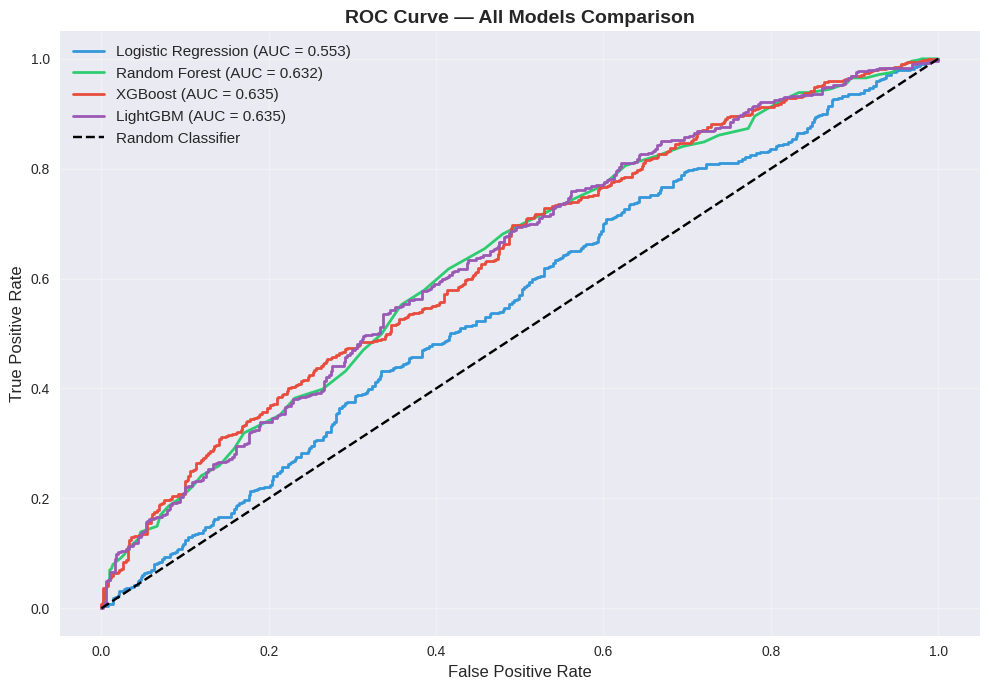

✅ ROC curves saved!


In [ ]:
plt.figure(figsize=(10, 7))

colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6']
for (name, res), color in zip(results.items(), colors):
    fpr, tpr, _ = roc_curve(y_test, res['prob'])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {res['auc']:.3f})",
             linewidth=2, color=color)

plt.plot([0,1], [0,1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve — All Models Comparison', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/SME_Loan_Default/outputs/roc_curves.png', dpi=150)
plt.show()
print("✅ ROC curves saved!")

In [ ]:
# Find best model by AUC
best_name = max(results, key=lambda x: results[x]['auc'])
best_model = results[best_name]['model']

print(f"🏆 Best Model: {best_name}")
print(f"📈 Best AUC-ROC: {results[best_name]['auc']:.4f}")

# Save model
model_path = '/content/drive/MyDrive/SME_Loan_Default/models/best_model.pkl'
pickle.dump(best_model, open(model_path, 'wb'))
pickle.dump(X.columns.tolist(), open(
    '/content/drive/MyDrive/SME_Loan_Default/models/feature_columns.pkl', 'wb'))

print(f"\n✅ Model saved to Drive!")

# AUC Summary Table
print("\n📊 Model Comparison Summary:")
print(f"{'Model':<25} {'AUC-ROC':>10}")
print("-" * 37)
for name, res in sorted(results.items(), key=lambda x: x[1]['auc'], reverse=True):
    print(f"{name:<25} {res['auc']:>10.4f}")

🏆 Best Model: XGBoost
📈 Best AUC-ROC: 0.6355

✅ Model saved to Drive!

📊 Model Comparison Summary:
Model                        AUC-ROC
-------------------------------------
XGBoost                       0.6355
LightGBM                      0.6351
Random Forest                 0.6320
Logistic Regression           0.5534


In [ ]:
import shap
shap.initjs()

# Load best model
model = pickle.load(open('/content/drive/MyDrive/SME_Loan_Default/models/best_model.pkl', 'rb'))

# Use a sample of test data for SHAP
X_sample = X_test.sample(300, random_state=42)

# Create SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_sample)

print("✅ SHAP values calculated!")
print(f"📊 Shape of SHAP values: {shap_values.shape}")

✅ SHAP values calculated!
📊 Shape of SHAP values: (300, 34)


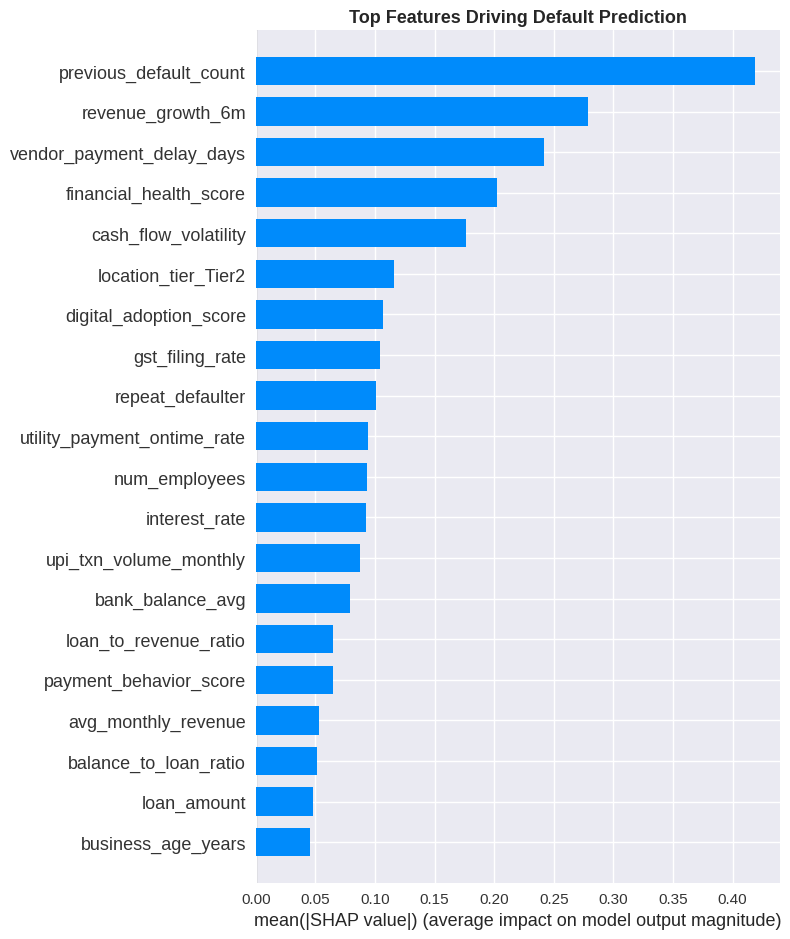

✅ SHAP importance plot saved!


In [ ]:
plt.figure()
shap.summary_plot(shap_values, X_sample, plot_type='bar', show=False)
plt.title('Top Features Driving Default Prediction', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/SME_Loan_Default/outputs/shap_importance.png',
            dpi=150, bbox_inches='tight')
plt.show()
print("✅ SHAP importance plot saved!")

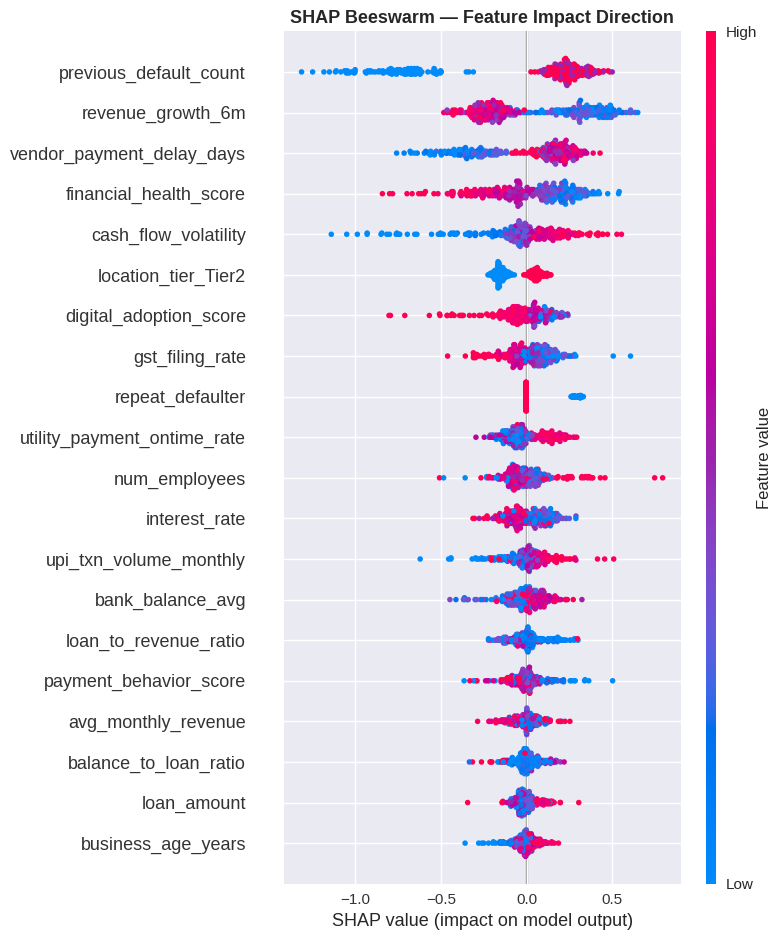

✅ SHAP beeswarm plot saved!


In [ ]:
plt.figure()
shap.summary_plot(shap_values, X_sample, show=False)
plt.title('SHAP Beeswarm — Feature Impact Direction', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/SME_Loan_Default/outputs/shap_beeswarm.png',
            dpi=150, bbox_inches='tight')
plt.show()
print("✅ SHAP beeswarm plot saved!")

In [ ]:
# Pick one SME and explain why it was flagged
idx = 0
single_shap = shap_values[idx]
single_data = X_sample.iloc[idx]

# Top risk factors for this SME
feature_impact = pd.Series(single_shap, index=X_sample.columns)

print("=" * 50)
print("🔍 INDIVIDUAL SME RISK EXPLANATION")
print("=" * 50)

print("\n🔴 Top 5 Factors INCREASING Default Risk:")
top_risk = feature_impact.nlargest(5)
for feat, val in top_risk.items():
    print(f"  ▲ {feat:<35} impact: +{val:.4f}  value: {single_data[feat]:.4f}")

print("\n🟢 Top 5 Factors DECREASING Default Risk:")
top_protect = feature_impact.nsmallest(5)
for feat, val in top_protect.items():
    print(f"  ▼ {feat:<35} impact: {val:.4f}  value: {single_data[feat]:.4f}")

prob = model.predict_proba(X_sample.iloc[[idx]])[0][1]
risk_score = round(prob * 100, 1)

if prob < 0.3:
    decision = "✅ APPROVE"
elif prob < 0.6:
    decision = "⚠️  REVIEW"
else:
    decision = "❌ REJECT"

print(f"\n📊 Risk Score:  {risk_score}/100")
print(f"🏦 Decision:    {decision}")

🔍 INDIVIDUAL SME RISK EXPLANATION

🔴 Top 5 Factors INCREASING Default Risk:
  ▲ repeat_defaulter                    impact: +0.2781  value: 0.0000
  ▲ payment_behavior_score              impact: +0.1617  value: 0.8024
  ▲ vendor_payment_delay_days           impact: +0.1207  value: 32.0000
  ▲ upi_txn_volume_monthly              impact: +0.1177  value: 3557.0000
  ▲ location_tier_Tier2                 impact: +0.1146  value: 1.0000

🟢 Top 5 Factors DECREASING Default Risk:
  ▼ previous_default_count              impact: -0.8369  value: 0.0000
  ▼ cash_flow_volatility                impact: -0.3569  value: 0.1126
  ▼ bank_balance_avg                    impact: -0.0931  value: 676580.3928
  ▼ digital_adoption_score              impact: -0.0831  value: 0.9600
  ▼ num_employees                       impact: -0.0812  value: 105.0000

📊 Risk Score:  29.200000762939453/100
🏦 Decision:    ✅ APPROVE


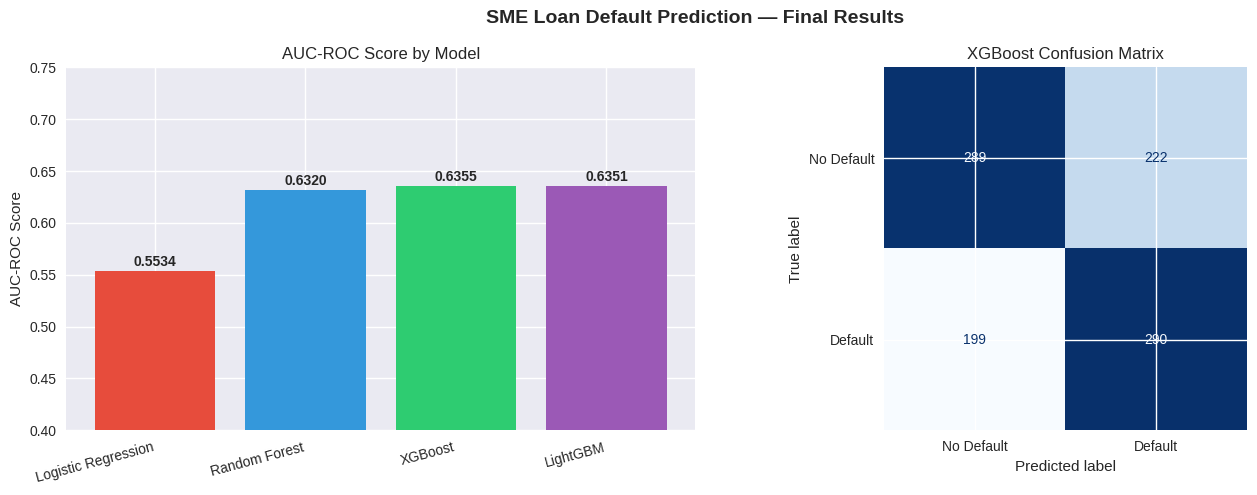

✅ Final results chart saved!


In [ ]:
# Model Performance Summary Chart
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('SME Loan Default Prediction — Final Results', fontsize=14, fontweight='bold')

# 1. AUC Comparison Bar Chart
model_names = list(results.keys())
auc_scores = [results[m]['auc'] for m in model_names]
colors = ['#e74c3c', '#95a5a6', '#95a5a6', '#95a5a6']  # highlight best
bars = axes[0].bar(model_names, auc_scores, color=['#e74c3c','#3498db','#2ecc71','#9b59b6'])
axes[0].set_title('AUC-ROC Score by Model')
axes[0].set_ylabel('AUC-ROC Score')
axes[0].set_ylim(0.4, 0.75)
axes[0].set_xticklabels(model_names, rotation=15, ha='right')
for bar, score in zip(bars, auc_scores):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                f'{score:.4f}', ha='center', fontweight='bold')

# 2. Confusion Matrix for Best Model
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, results['XGBoost']['pred'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Default', 'Default'])
disp.plot(ax=axes[1], cmap='Blues', colorbar=False)
axes[1].set_title('XGBoost Confusion Matrix')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/SME_Loan_Default/outputs/final_results.png', dpi=150)
plt.show()
print("✅ Final results chart saved!")

In [ ]:
print("=" * 55)
print("   SME LOAN DEFAULT PREDICTION — PROJECT SUMMARY")
print("=" * 55)

print(f"""
📁 DATASET
   • Total SMEs:          5,000
   • Total Features:      34
   • Alternative Features: 10 (engineered)
   • Default Rate:        ~49%

🤖 MODELS TRAINED
   • Logistic Regression  AUC: {results['Logistic Regression']['auc']:.4f}
   • Random Forest        AUC: {results['Random Forest']['auc']:.4f}
   • LightGBM             AUC: {results['LightGBM']['auc']:.4f}
   • XGBoost ✅ BEST      AUC: {results['XGBoost']['auc']:.4f}

🔍 EXPLAINABILITY
   • SHAP values computed for all predictions
   • Top risk factors identified per SME
   • Individual loan decisions explained

💾 SAVED FILES
   • Raw Data:       data/raw/sme_raw_data.csv
   • Features:       data/processed/sme_features.csv
   • Best Model:     models/best_model.pkl
   • EDA Charts:     outputs/eda_plots.png
   • ROC Curves:     outputs/roc_curves.png
   • SHAP Plots:     outputs/shap_importance.png
   • Final Results:  outputs/final_results.png

🏦 BUSINESS VALUE
   • Risk Score 0-30  → APPROVE  ✅
   • Risk Score 30-60 → REVIEW   ⚠️
   • Risk Score 60+   → REJECT   ❌
""")
print("=" * 55)
print("   🎉 PROJECT COMPLETE!")
print("=" * 55)

   SME LOAN DEFAULT PREDICTION — PROJECT SUMMARY

📁 DATASET
   • Total SMEs:          5,000
   • Total Features:      34
   • Alternative Features: 10 (engineered)
   • Default Rate:        ~49%

🤖 MODELS TRAINED
   • Logistic Regression  AUC: 0.5534
   • Random Forest        AUC: 0.6320
   • LightGBM             AUC: 0.6351
   • XGBoost ✅ BEST      AUC: 0.6355

🔍 EXPLAINABILITY
   • SHAP values computed for all predictions
   • Top risk factors identified per SME
   • Individual loan decisions explained

💾 SAVED FILES
   • Raw Data:       data/raw/sme_raw_data.csv
   • Features:       data/processed/sme_features.csv
   • Best Model:     models/best_model.pkl
   • EDA Charts:     outputs/eda_plots.png
   • ROC Curves:     outputs/roc_curves.png
   • SHAP Plots:     outputs/shap_importance.png
   • Final Results:  outputs/final_results.png

🏦 BUSINESS VALUE
   • Risk Score 0-30  → APPROVE  ✅
   • Risk Score 30-60 → REVIEW   ⚠️
   • Risk Score 60+   → REJECT   ❌

   🎉 PROJECT COMPLETE!


In [ ]:
from google.colab import files

files.download('/content/drive/MyDrive/SME_Loan_Default/outputs/eda_plots.png')
files.download('/content/drive/MyDrive/SME_Loan_Default/outputs/roc_curves.png')
files.download('/content/drive/MyDrive/SME_Loan_Default/outputs/shap_importance.png')
files.download('/content/drive/MyDrive/SME_Loan_Default/outputs/final_results.png')
print("All files downloaded!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

All files downloaded!


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
for folder in os.listdir('/content/drive/MyDrive'):
    print(folder)

Colab Notebooks
Trend_Forecast_homework.xls
ch10.pptx
ch8.pptx
ch9.pptx
Saved from the Google app
give me 22 slides.gsheet
can u help me in making product sheet with all th....gsheet
CN-Lab5.pdf
CN-Lab5.gdoc
LAB6-OpenFlow Tutorial with Ryu Controller.pdf
LAB6-OpenFlow Tutorial with Ryu Controller.gdoc
Rust code.png
Code Db.png
code DB 2.png
SME_Loan_Default
AI_Business_Advisor
